In [524]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [525]:
df=pd.read_csv('WineQT.csv')

In [526]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Content
Input variables :

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Data Exploration

In [527]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [528]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [529]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

Quality > 6.5 = Good

In [530]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [531]:
df=df.drop('Id',axis=1)

In [532]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [533]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [535]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The datatype and null values in the dataset looks absolutely fine!


# Feature Engineering

In [536]:
#Replacing the 0 with the mean of the data
df['fixed acidity']=df['fixed acidity'].replace(0,df['fixed acidity'].mean())
df['volatile acidity']=df['volatile acidity'].replace(0,df['volatile acidity'].mean())
df['citric acid']=df['citric acid'].replace(0,df['citric acid'].mean())
df['residual sugar']=df['residual sugar'].replace(0,df['residual sugar'].mean())
df['chlorides']=df['chlorides'].replace(0,df['chlorides'].mean())
df['free sulfur dioxide']=df['free sulfur dioxide'].replace(0,df['free sulfur dioxide'].mean())
df['total sulfur dioxide']=df['total sulfur dioxide'].replace(0,df['total sulfur dioxide'].mean())
df['density']=df['density'].replace(0,df['density'].mean())
df['pH']=df['pH'].replace(0,df['pH'].mean())
df['alcohol']=df['alcohol'].replace(0,df['alcohol'].mean())
df['sulphates']=df['sulphates'].replace(0,df['sulphates'].mean())

quality > 6.5 is "good"
quality < 6.5 is "bad"

good=1
bad=0

In [537]:
df['quality']=df['quality'].apply(lambda x:1 if x>6.5 else 0)

### Lets Vizualize the category of wine

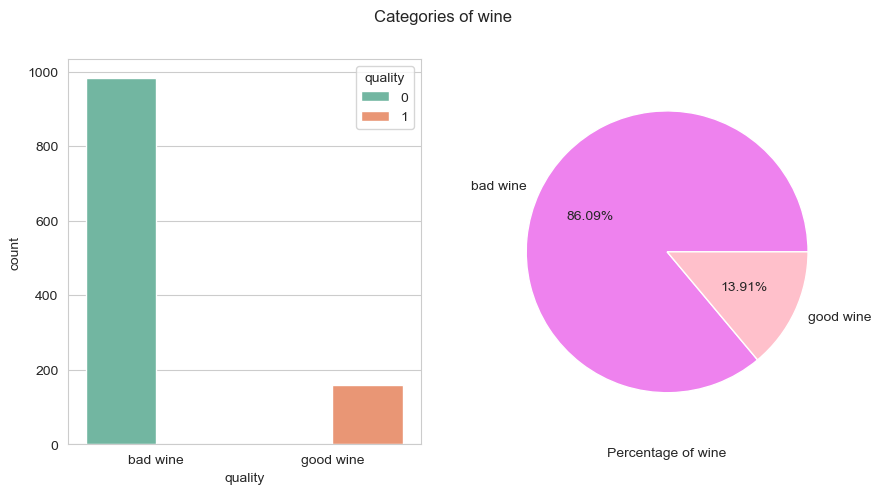

In [538]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
sns.countplot(df['quality'],hue=df['quality'],palette='Set2')
plt.xticks([0,1],['bad wine','good wine'])

plt.subplot(1,2,2)
plt.pie(df['quality'].value_counts().values,labels=['bad wine','good wine'],autopct="%.2f%%",colors=['violet','pink'])
plt.xlabel('\nPercentage of wine')


plt.suptitle('Categories of wine')
plt.show()


### Data Visualization


In [539]:
def vizualize(data):
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,3))
    sns.histplot(data,x=data,palette='Set2',multiple='stack',shrink=1.5,kde=True,alpha=.6,hue=df["quality"])
    plt.legend(['bad wine','good wine'])
    plt.figtext(0.75, 0.3, f'{data.describe()}')

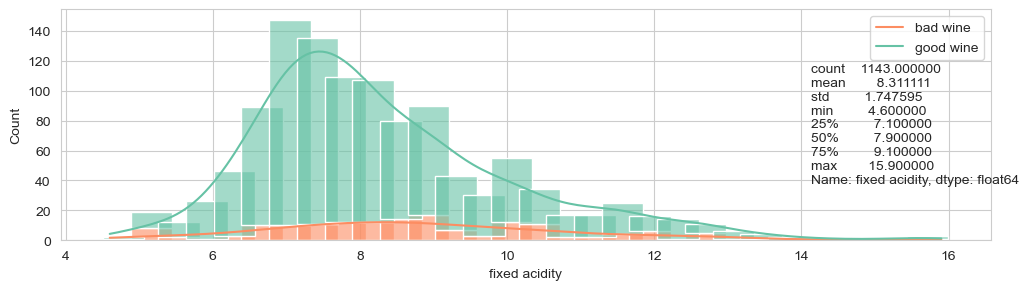

In [540]:
vizualize(df['fixed acidity'])

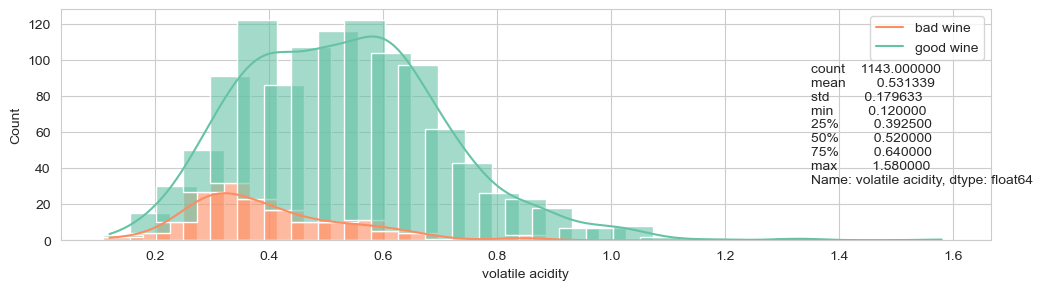

In [541]:
vizualize(df['volatile acidity'])

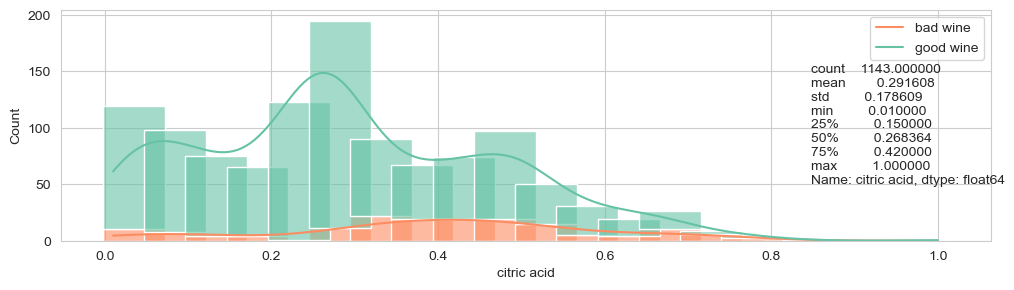

In [542]:
vizualize(df['citric acid'])

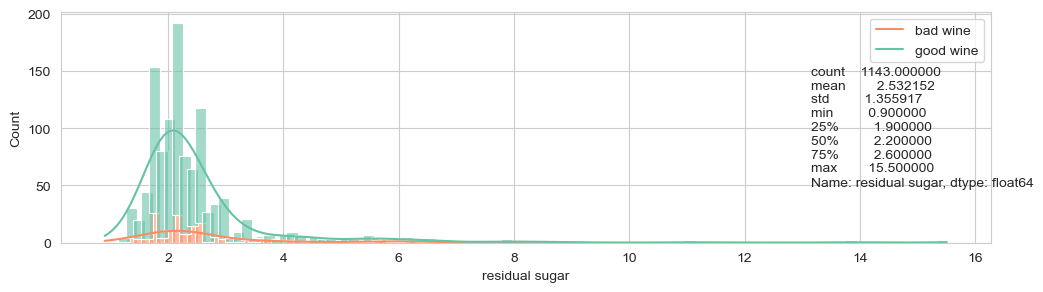

In [543]:
vizualize(df['residual sugar'])

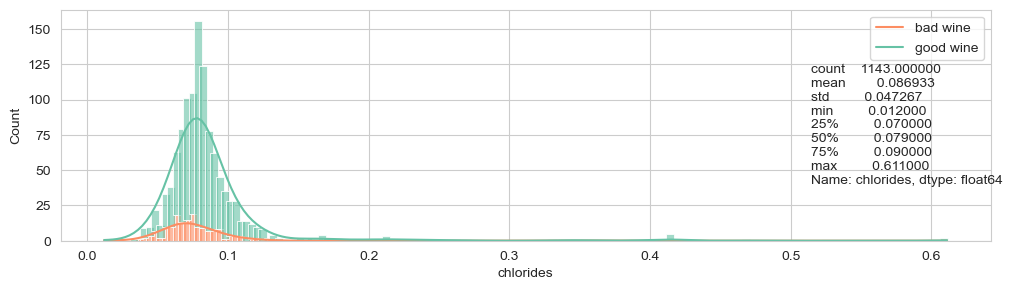

In [544]:
vizualize(df['chlorides'])

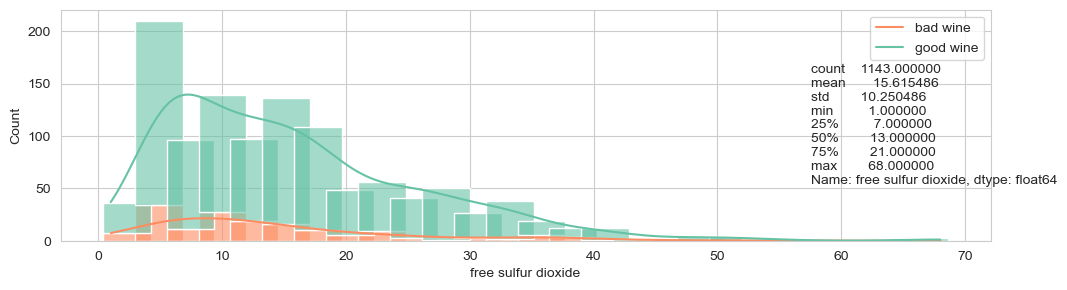

In [545]:
vizualize(df['free sulfur dioxide'])

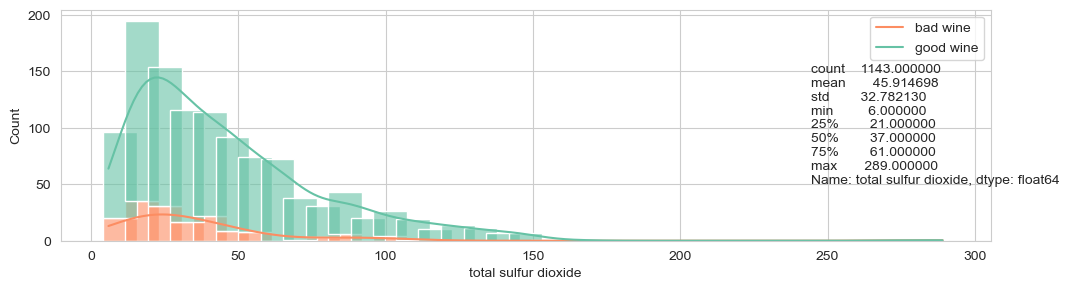

In [546]:
vizualize(df['total sulfur dioxide'])

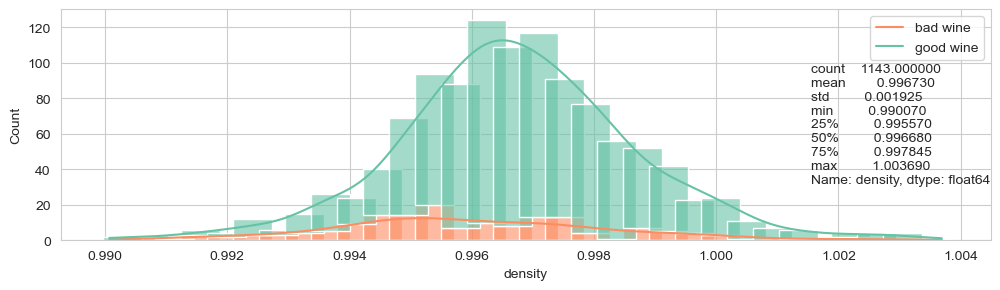

In [547]:
vizualize(df['density'])

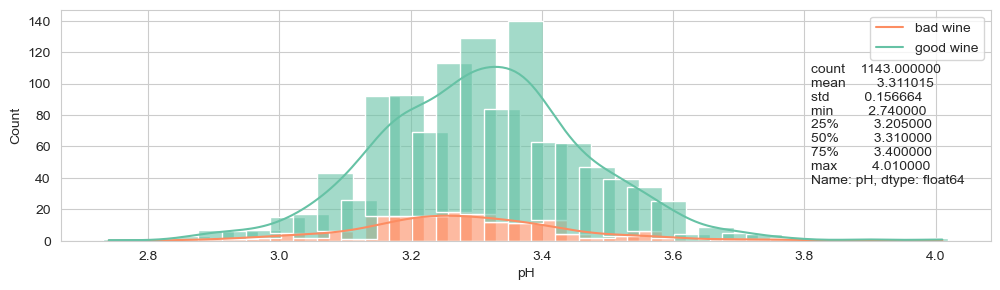

In [548]:
vizualize(df['pH'])

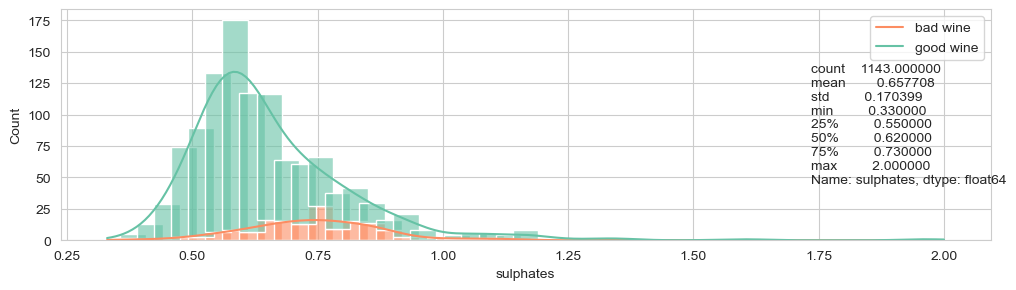

In [549]:
vizualize(df['sulphates'])

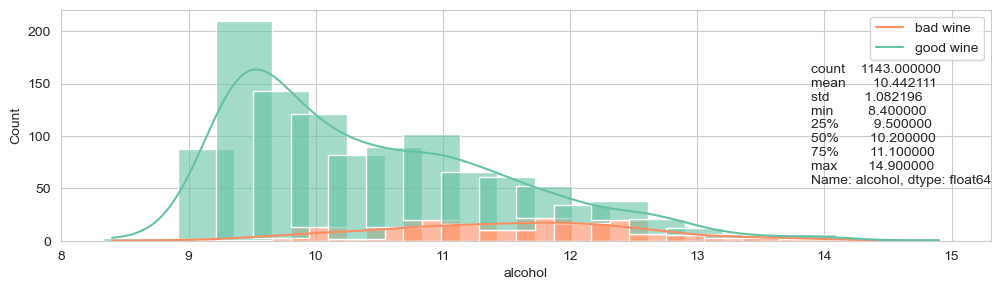

In [550]:
vizualize(df['alcohol'])

## Lets check for outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

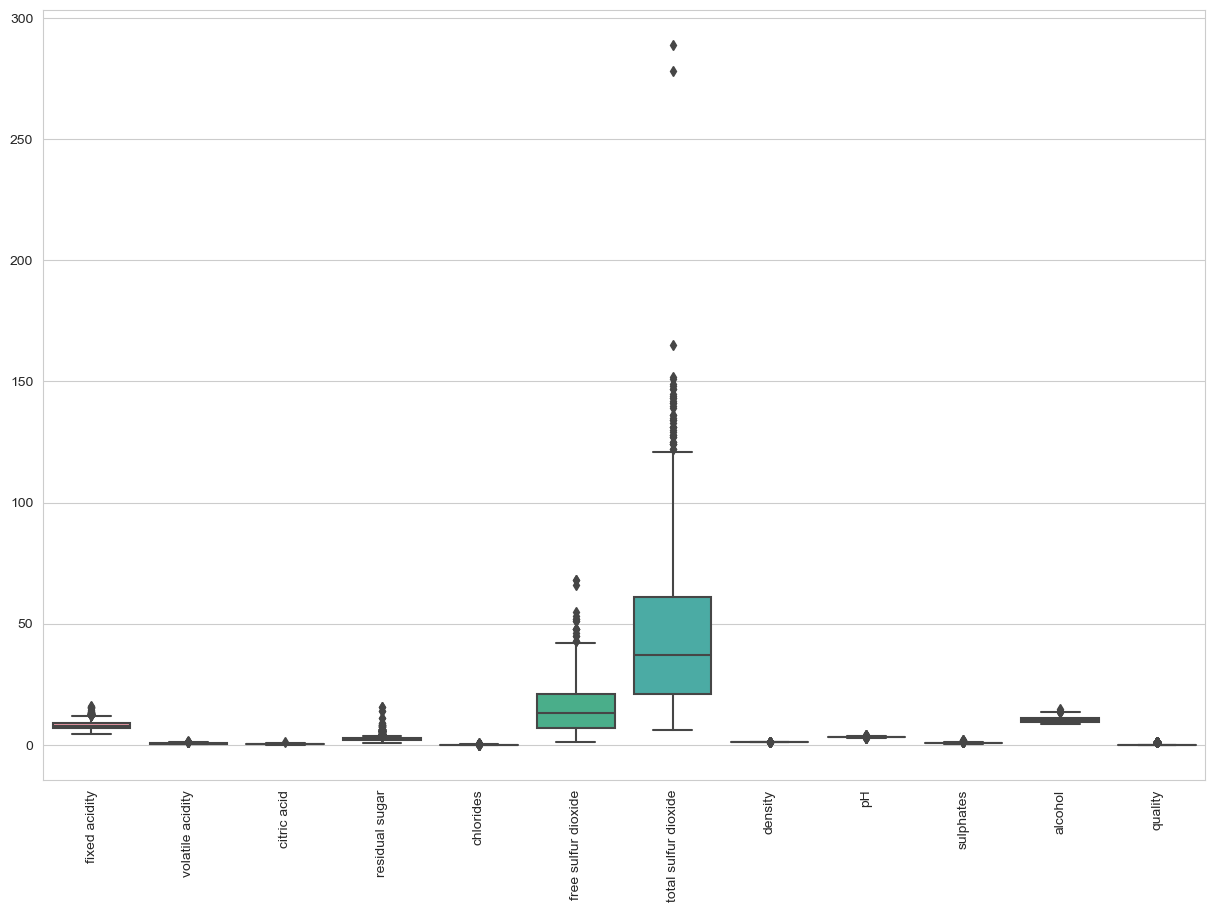

In [551]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

Taking a closer look at the boxplot we can see outliers in the free sulfur dioxide,total sulfur dioxide,residual sugar


In [552]:
#Removing 2% from free sulfur dioxide
q=df['free sulfur dioxide'].quantile(0.98)
df=df[df['free sulfur dioxide']<q]

#Removing 3% from total sulfur dioxide
q=df['total sulfur dioxide'].quantile(0.97)
df=df[df['total sulfur dioxide']<q]

#Removing 1% from residual sugar
q=df['residual sugar'].quantile(0.99)
df=df[df['residual sugar']<q]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

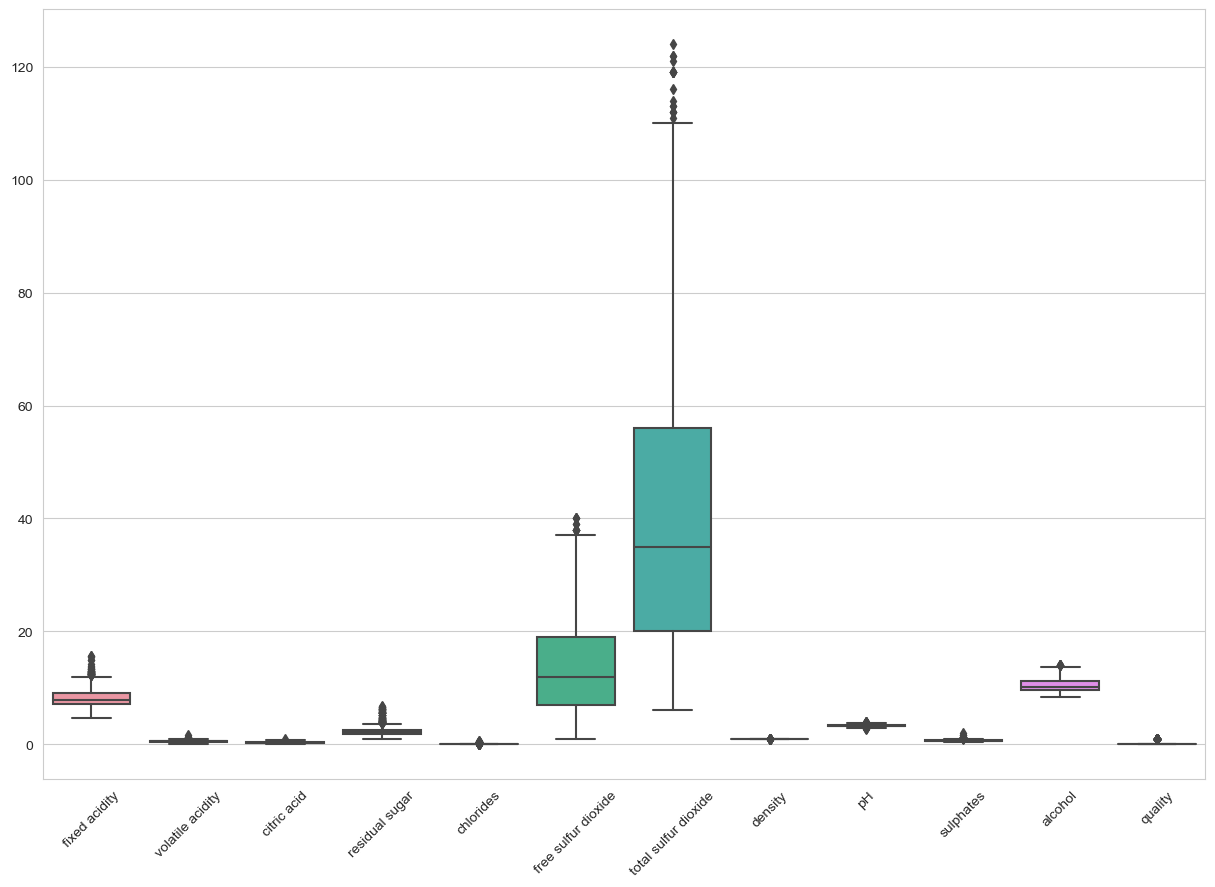

In [553]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)

#### As you can see the outliers have been treated well

### Lets see how data is distributed for every column

In [554]:
X=df.drop(columns='quality')
y=df['quality']

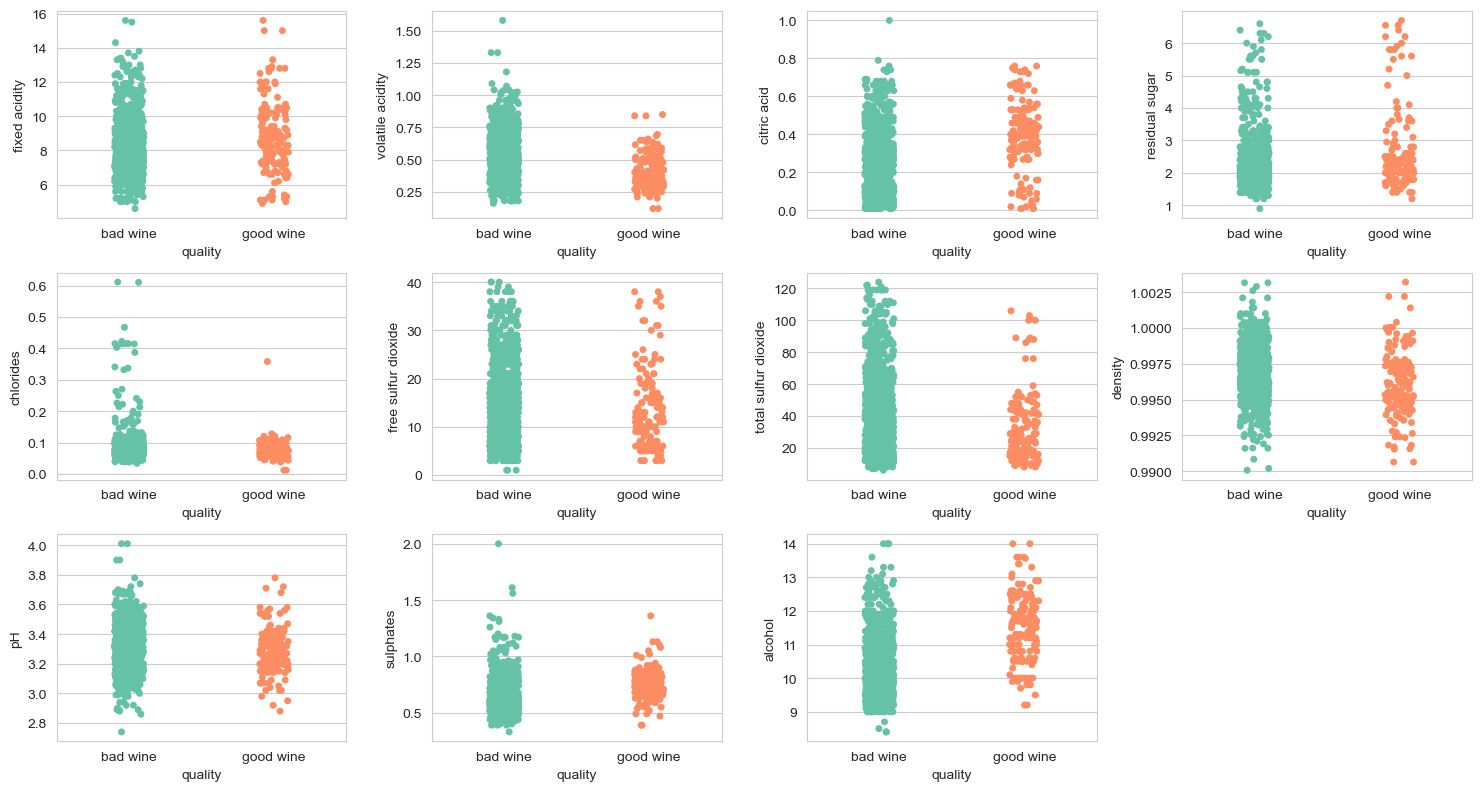

In [555]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plotnum=1

for column in X:
    if plotnum<=11:
        plt.subplot(3,4,plotnum)
        sns.stripplot(y,X[column],palette='Set2')
        plt.xticks([0,1],['bad wine','good wine'])
    plotnum+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

## Visualization of the contents in the wine

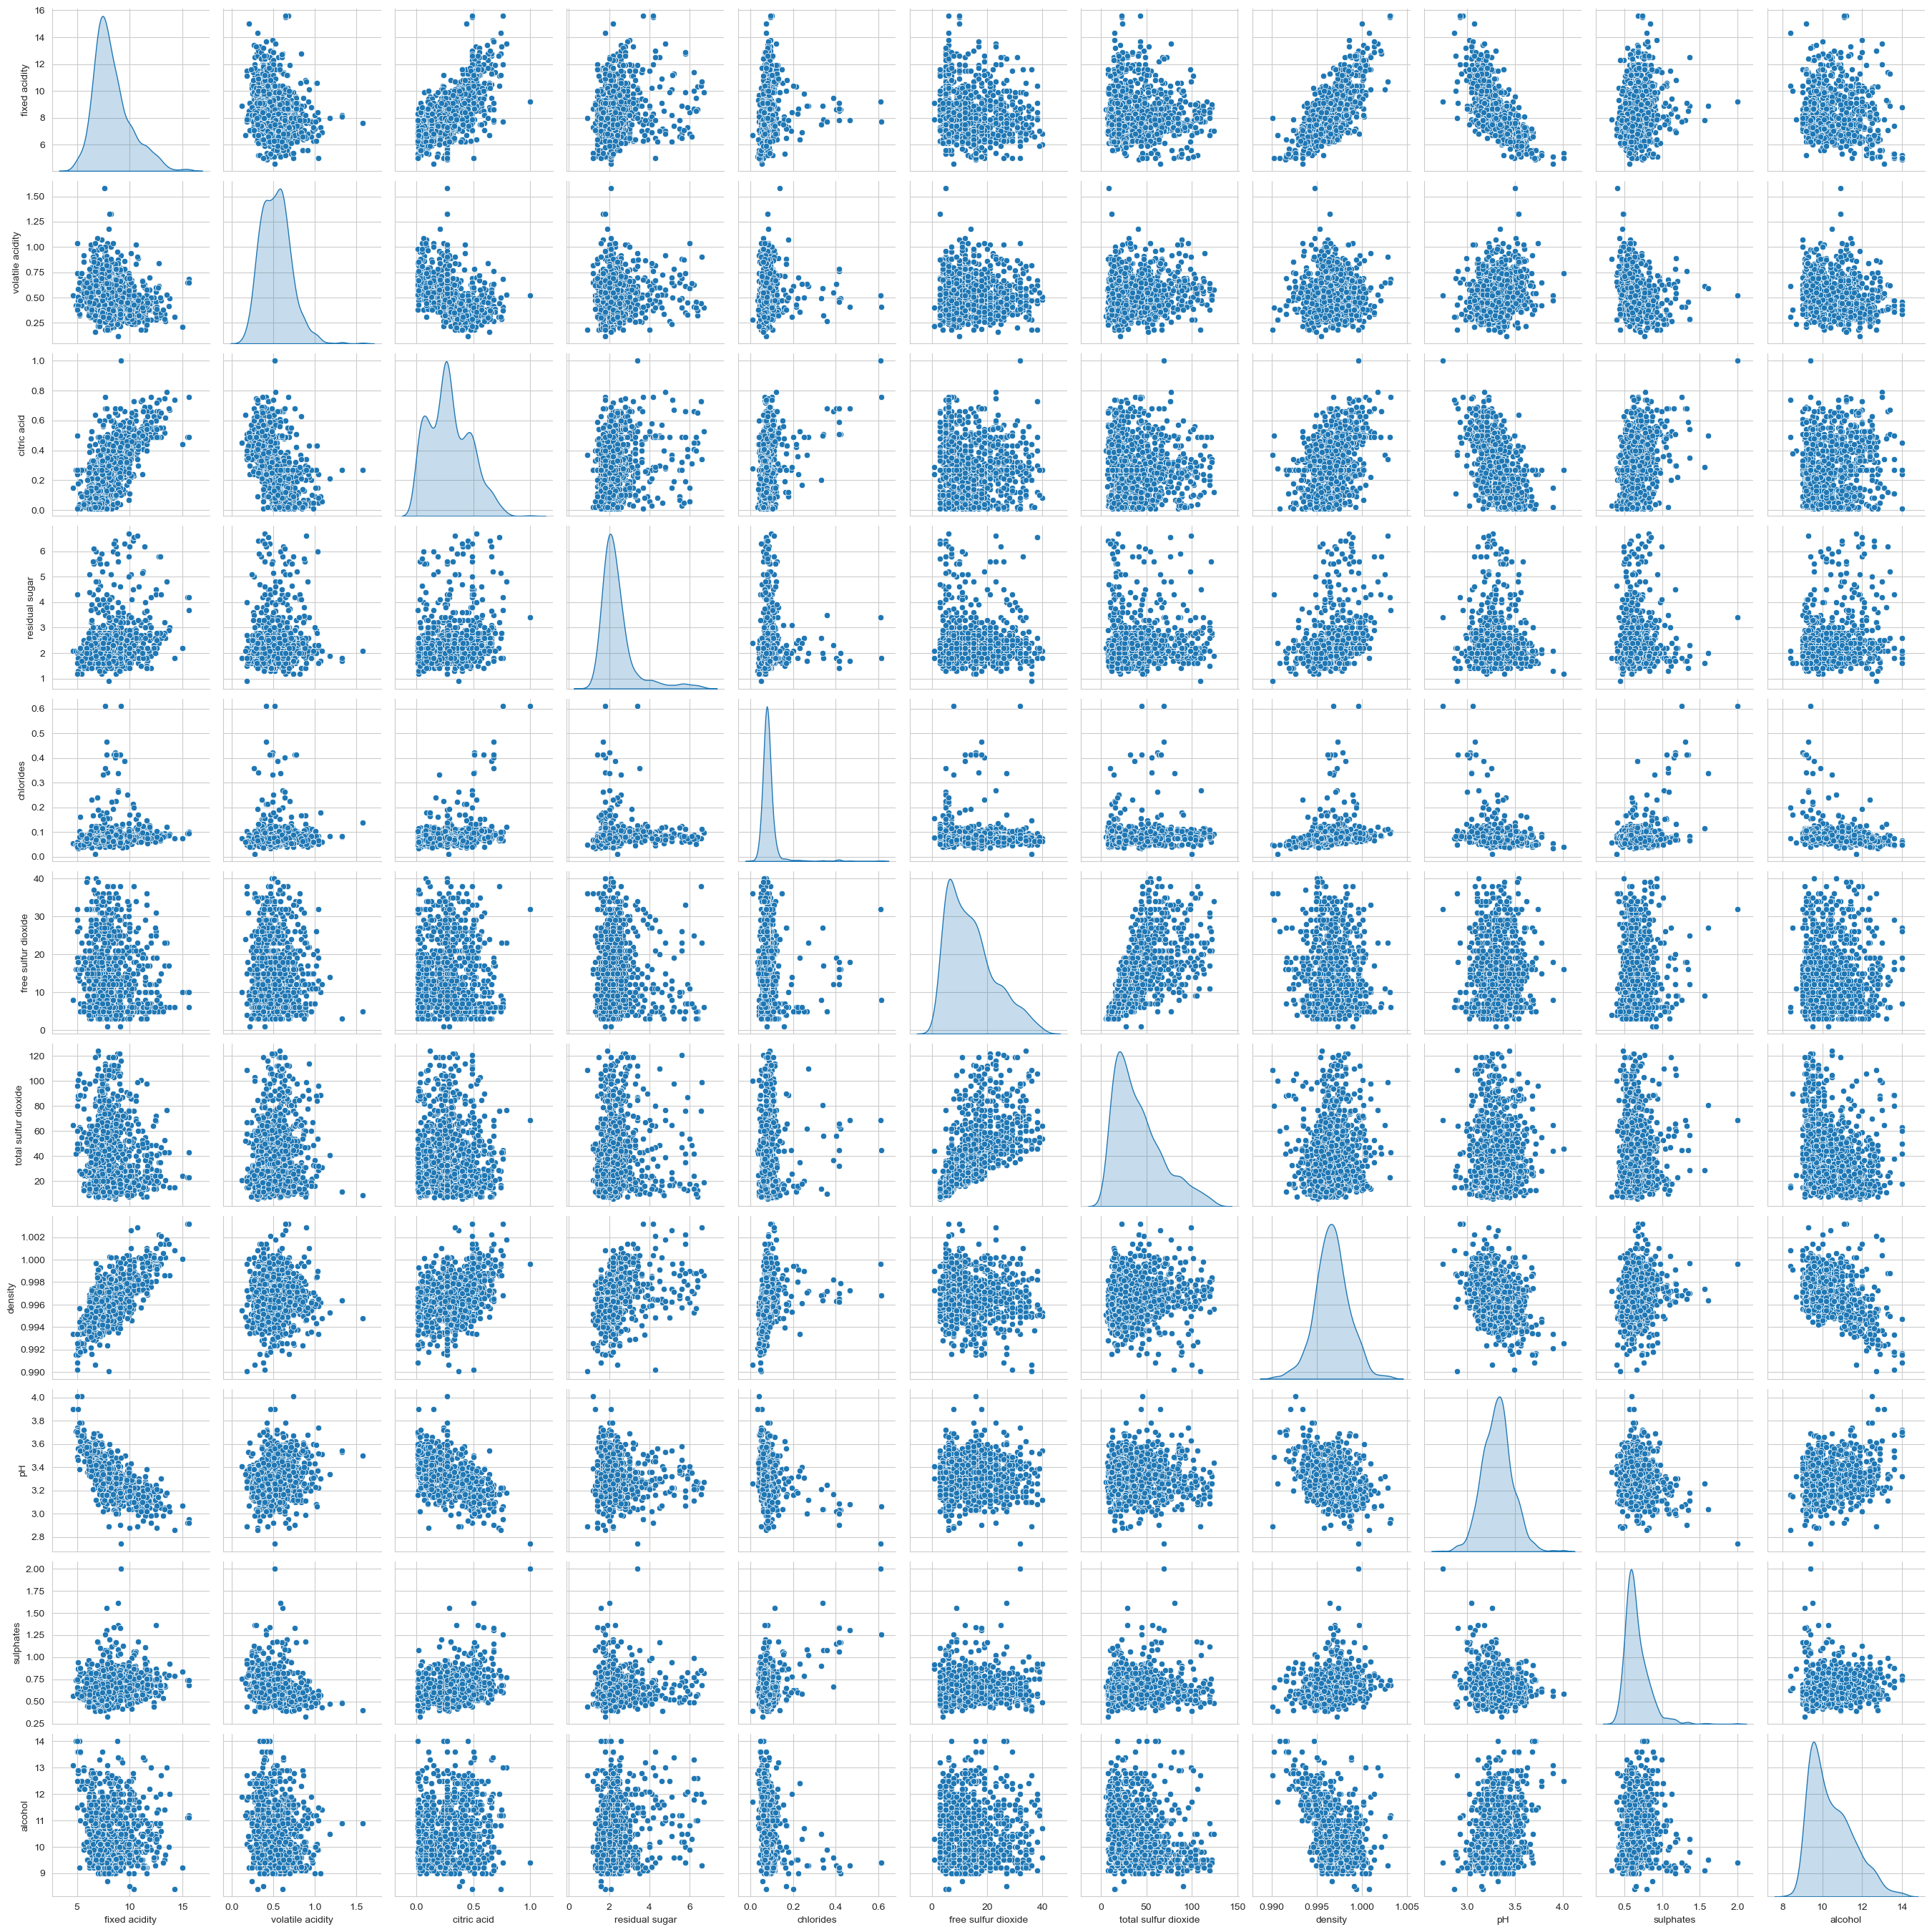

In [556]:
df=df.drop(columns='quality')
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

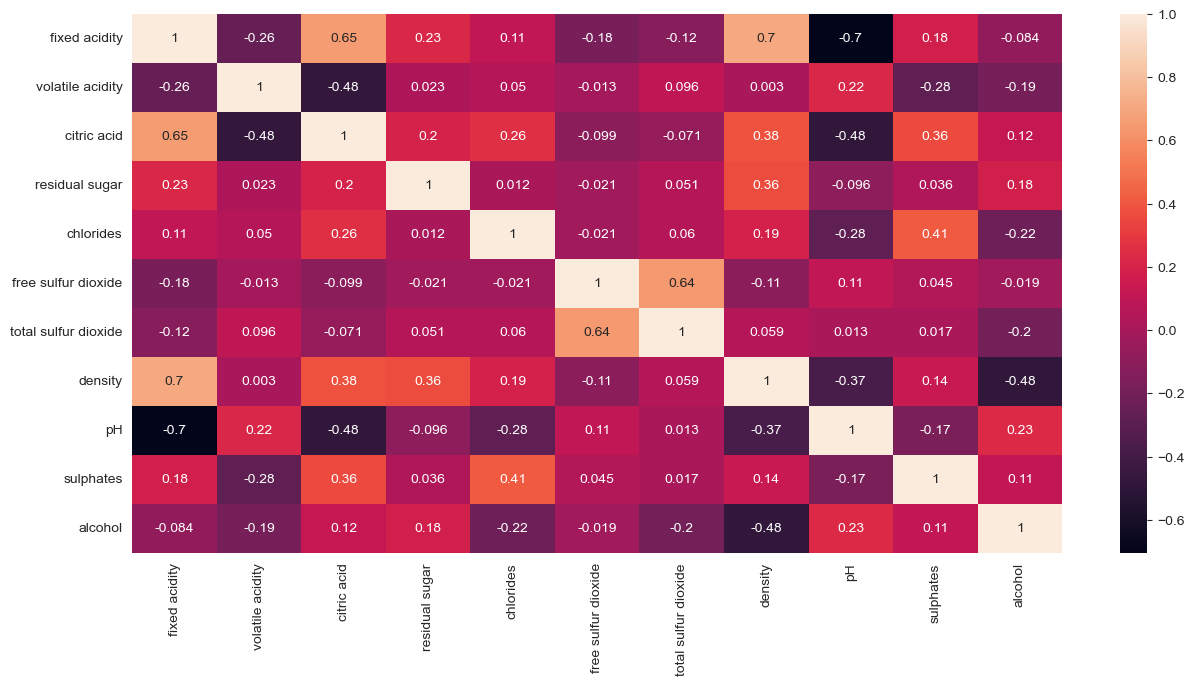

In [557]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)


##### After Vizualizing the data we found out that:-
1.Fixed Acidity and pH is highly co related

2.Volatile Acidity and citric acidity are highly corelated

3.Citric acid an pH is also highly corelated

In [560]:
X=df.drop(columns='fixed acidity')

In [561]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [562]:
vif=pd.DataFrame()
vif['Factor']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
vif

,Factor,Features
0,1.533609,volatile acidity
1,2.287101,citric acid
2,1.486513,residual sugar
3,1.506409,chlorides
4,1.819673,free sulfur dioxide
5,1.876956,total sulfur dioxide
6,2.526568,density
7,1.508841,pH
8,1.479054,sulphates
9,2.331881,alcohol


On checking the multicolliearity in the first place we found out that the vif factor of Fixed Acidity was was greater than 5. So  I decided to drop the column before scaling then again checked the multicollinearity and got all factors less than 5.

## Model building

Lets do the train test split

In [564]:
X_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.33,random_state=42)

Lets train the model

In [568]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

Great now lets start the prediction

In [569]:
y_pred=log_reg.predict(x_test)

In [571]:
#Accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8728813559322034

In [573]:
#Confusion Matrix
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[287,  13],
       [ 32,  22]], dtype=int64)

In [575]:
true_positive = con_mat[0][0]
false_positive = con_mat[0][1]
false_negative = con_mat[1][0]
true_negative = con_mat[1][1]

In [588]:
#Precision
from sklearn.metrics import precision_score
precisions=precision_score(y_test,y_pred)
precisions

0.6285714285714286

In [589]:
#Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.4074074074074074

In [590]:
#f1 
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)
f1

0.4943820224719101

In [591]:
#AUC
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred)
auc

0.682037037037037

In [587]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

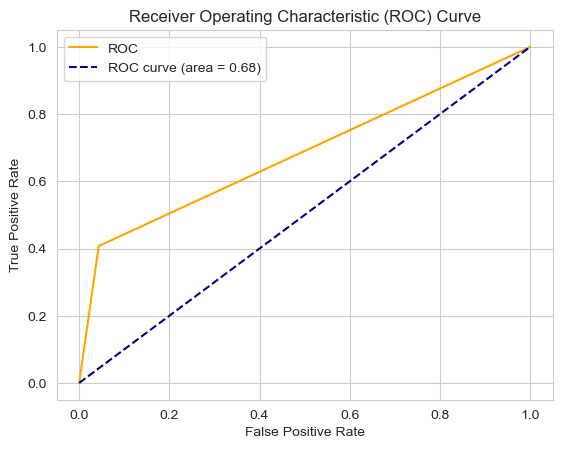

In [586]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [592]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       300
           1       0.63      0.41      0.49        54

    accuracy                           0.87       354
   macro avg       0.76      0.68      0.71       354
weighted avg       0.86      0.87      0.86       354

